In [53]:
import requests
import pandas as pd
from decimal import Decimal, getcontext


url = "https://data.elexon.co.uk/bmrs/api/v1/balancing/settlement/system-prices/2024-10-10?format=json"

def fetch_system_prices(api_url):
    try:
        response = requests.get(api_url)
        response.raise_for_status()  # Check for HTTP errors
        return response.json()  # Return the JSON data
    except requests.exceptions.HTTPError as err:
        print(f"HTTP error occurred: {err}")
    except Exception as err:
        print(f"An error occurred: {err}")
    return None

# Fetch the data
data = fetch_system_prices(url)
data



{'metadata': {'datasets': ['DISEBSP']},
 'data': [{'settlementDate': '2024-10-10',
   'settlementPeriod': 1,
   'startTime': '2024-10-09T23:00:00Z',
   'createdDateTime': '2024-10-10T23:44:37Z',
   'systemSellPrice': 90.0,
   'systemBuyPrice': 90.0,
   'bsadDefaulted': False,
   'priceDerivationCode': 'P',
   'reserveScarcityPrice': 0.0,
   'netImbalanceVolume': 55.81123015873016,
   'sellPriceAdjustment': 0.0,
   'buyPriceAdjustment': 0.0,
   'replacementPrice': None,
   'replacementPriceReferenceVolume': None,
   'totalAcceptedOfferVolume': 821.9844444444444,
   'totalAcceptedBidVolume': -1100.6732142857143,
   'totalAdjustmentSellVolume': 0.0,
   'totalAdjustmentBuyVolume': 334.5,
   'totalSystemTaggedAcceptedOfferVolume': 820.9844444444444,
   'totalSystemTaggedAcceptedBidVolume': -1100.6732142857143,
   'totalSystemTaggedAdjustmentSellVolume': None,
   'totalSystemTaggedAdjustmentBuyVolume': 334.5},
  {'settlementDate': '2024-10-10',
   'settlementPeriod': 2,
   'startTime': '2024

In [44]:
def process_data(json_data):
    if not json_data or "data" not in json_data:
        print("No data available.")
        return None


    cleaned_data = []
    for entry in json_data['data']:
        cleaned_data.append({
            'settlementDate': entry['settlementDate'],
            'systemSellPrice': Decimal(entry['systemSellPrice']),
            'systemBuyPrice': Decimal(entry['systemBuyPrice']),
            'netImbalanceVolume': Decimal(entry['netImbalanceVolume']),
            'startTime': entry['startTime'],
            'settlementPeriod': entry['settlementPeriod']

        })

        
    df = pd.DataFrame(cleaned_data)
    df['startTime'] = pd.to_datetime(df['startTime'])  # Convert start time to datetime
    return df

# Process the fetched data
df_prices = process_data(data)
df_prices
df_prices['systemSellPrice']
# df_prices['systemBuyPrice']

0                                                    90
1                                                    90
2     89.1903210795718877079707453958690166473388671875
3                                                    90
4     22.1400000000000005684341886080801486968994140625
5     84.2999999999999971578290569595992565155029296875
6     15.7100000000000008526512829121202230453491210...
7     14.8699999999999992184029906638897955417633056...
8     21.3599999999999994315658113919198513031005859375
9     20.1000000000000014210854715202003717422485351...
10                                                   90
11    97.9500000000000028421709430404007434844970703125
12    97.9500000000000028421709430404007434844970703125
13    51.4299999999999997157829056959599256515502929...
14    51.4299999999999997157829056959599256515502929...
15    106.900000000000005684341886080801486968994140625
16    106.900000000000005684341886080801486968994140625
17    104.07999999999999829469743417575955390930

In [46]:
def compare_prices(row):
    sell_price = row['systemSellPrice']
    buy_price = row['systemBuyPrice']

    # Check if the buy and sell prices are exactly the same
    if sell_price == buy_price:
        return "Equal"
    elif sell_price > buy_price:
        return "Sell price higher"
    else:
        return "Buy price higher"

# Check if data is available and proceed to compare the values
if df_prices is not None:
    # Apply the comparison function for each row
    df_prices['priceComparison'] = df_prices.apply(compare_prices, axis=1)

    # Display the results (show the first few rows)
    print("Comparison of Sell and Buy Prices:")
#     print(df_prices[['startTime', 'systemSellPrice', 'systemBuyPrice', 'priceComparison']].head())

else:
    print("No data was processed.")
df_prices

Comparison of Sell and Buy Prices:


,settlementDate,systemSellPrice,systemBuyPrice,netImbalanceVolume,startTime,settlementPeriod,priceComparison
0,2024-10-10,90,90,55.8112301587301615768410556484013795852661132...,2024-10-09 23:00:00+00:00,1,Equal
1,2024-10-10,90,90,23.5024372023809533516214287374168634414672851...,2024-10-09 23:30:00+00:00,2,Equal
2,2024-10-10,89.1903210795718877079707453958690166473388671875,89.1903210795718877079707453958690166473388671875,8.1713393813131318665909930132329463958740234375,2024-10-10 00:00:00+00:00,3,Equal
3,2024-10-10,90,90,104.590075575396824092422320973128080368041992...,2024-10-10 00:30:00+00:00,4,Equal
4,2024-10-10,22.1400000000000005684341886080801486968994140625,22.1400000000000005684341886080801486968994140625,-25.127421527777777043866080930456519126892089...,2024-10-10 01:00:00+00:00,5,Equal
5,2024-10-10,84.2999999999999971578290569595992565155029296875,84.2999999999999971578290569595992565155029296875,16.8520912835249028205453214468434453010559082...,2024-10-10 01:30:00+00:00,6,Equal
6,2024-10-10,15.7100000000000008526512829121202230453491210...,15.7100000000000008526512829121202230453491210...,-14.048077025058274713842365599703043699264526...,2024-10-10 02:00:00+00:00,7,Equal
7,2024-10-10,14.8699999999999992184029906638897955417633056...,14.8699999999999992184029906638897955417633056...,-35.033333333333331438552704639732837677001953125,2024-10-10 02:30:00+00:00,8,Equal
8,2024-10-10,21.3599999999999994315658113919198513031005859375,21.3599999999999994315658113919198513031005859375,-14.431082222222222810614766785874962806701660...,2024-10-10 03:00:00+00:00,9,Equal
9,2024-10-10,20.1000000000000014210854715202003717422485351...,20.1000000000000014210854715202003717422485351...,-140.37768253968255294239497743546962738037109375,2024-10-10 03:30:00+00:00,10,Equal


In [18]:
df_prices.to_csv('system_prices_2024_02_01.csv', index=False)
# print("Data saved")


Cleaned data:
  settlementDate  systemSellPrice  systemBuyPrice  netImbalanceVolume  \
0     2024-02-01            39.23           39.23          -65.672884   
1     2024-02-01            38.33           38.33         -219.255139   
2     2024-02-01            34.33           34.33         -344.632407   
3     2024-02-01            34.33           34.33         -387.817593   
4     2024-02-01            33.82           33.82         -447.621159   

                  startTime  settlementPeriod  
0 2024-02-01 00:00:00+00:00                 1  
1 2024-02-01 00:30:00+00:00                 2  
2 2024-02-01 01:00:00+00:00                 3  
3 2024-02-01 01:30:00+00:00                 4  
4 2024-02-01 02:00:00+00:00                 5  
Data saved to 'system_prices_2024_02_01.csv'.


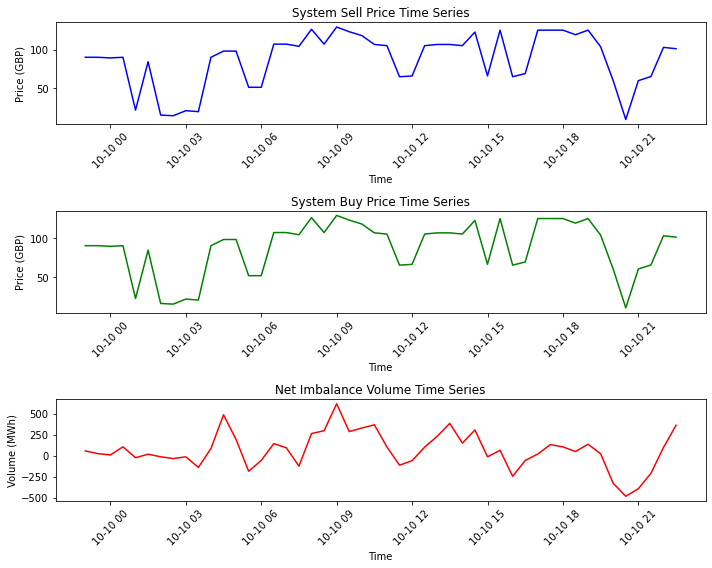

In [51]:
import matplotlib.pyplot as plt
if df_prices is not None:
    # Create two half-hourly time series for sell and buy prices
    sell_price_series = df_prices[['startTime', 'systemSellPrice']]
#     print(sell_price_series)
    buy_price_series = df_prices[['startTime', 'systemBuyPrice']]
#     print(buy_price_series)
    net_volume_series = df_prices[['startTime', 'netImbalanceVolume']]


# #     # Save the two time series to CSV files for further use
# #     sell_price_series.to_csv('sell_price_time_series_2024_02_01.csv', index=False)
# #     buy_price_series.to_csv('buy_price_time_series_2024_02_01.csv', index=False)


    # Plot the time series for visual comparison
    plt.figure(figsize=(10, 8))

    # Plot system sell price
    plt.subplot(3, 1, 1)
    plt.plot(sell_price_series['startTime'], sell_price_series['systemSellPrice'], label='System Sell Price', color='blue')
    plt.title('System Sell Price Time Series')
    plt.xlabel('Time')
    plt.ylabel('Price (GBP)')
    plt.xticks(rotation=45)

    # Plot system buy price
    plt.subplot(3, 1, 2)
    plt.plot(buy_price_series['startTime'], buy_price_series['systemBuyPrice'], label='System Buy Price', color='green')
    plt.title('System Buy Price Time Series')
    plt.xlabel('Time')
    plt.ylabel('Price (GBP)')
    plt.xticks(rotation=45)

    # Plot net imbalance volume
    plt.subplot(3, 1, 3)
    plt.plot(net_volume_series['startTime'], net_volume_series['netImbalanceVolume'], label='Net Imbalance Volume', color='red')
    plt.title('Net Imbalance Volume Time Series')
    plt.xlabel('Time')
    plt.ylabel('Volume (MWh)')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

else:
    print("No data was processed.")

In [52]:
# Assuming df_prices contains the data with Decimal values for netImbalanceVolume, systemBuyPrice, and systemSellPrice

def calculate_total_imbalance_cost_and_unit_rate(df):
    total_imbalance_cost = Decimal(0)
    total_absolute_imbalance_volume = Decimal(0)

    # Loop over each row (each settlement period)
    for index, row in df.iterrows():
        net_volume = row['netImbalanceVolume']
        if net_volume < 0:
            # System is short, use the system buy price
            cost = net_volume * row['systemBuyPrice']
        else:
            # System is long, use the system sell price
            cost = net_volume * row['systemSellPrice']

        total_imbalance_cost += cost
        total_absolute_imbalance_volume += abs(net_volume)

    # Calculate the average unit rate
    if total_absolute_imbalance_volume != 0:
        average_unit_rate = total_imbalance_cost / total_absolute_imbalance_volume
    else:
        average_unit_rate = Decimal(0)

    return total_imbalance_cost, average_unit_rate

# Assuming df_prices is your DataFrame containing the daily data
total_imbalance_cost, average_unit_rate = calculate_total_imbalance_cost_and_unit_rate(df_prices)

# Generate the message
message = (
    f"Total Daily Imbalance Cost: £{total_imbalance_cost:.2f}\n"
    f"Daily Imbalance Unit Rate: £{average_unit_rate:.5f} per MWh"
)

print(message)


Total Daily Imbalance Cost: £501167.14
Daily Imbalance Unit Rate: £61.73693 per MWh
